# Dataset from Roboflow

In [1]:
#https://universe.roboflow.com/tennis-ai/football-boxes/dataset/1/images/af6f0bab5f107995ad3f2824cbc97094
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AE4x6F2UzA8PofP1XkmV")
project = rf.workspace("tennis-ai").project("football-boxes")
version = project.version(1)
dataset = version.download("yolov8")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.1

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics==8.0.196`, to intall it `pip install ultralytics==8.0.196`.



Extracting Dataset Version Zip to football-boxes-1 in yolov8:: 100%|██████████| 1334/1334 [00:00<00:00, 4327.05it/s]


# Setup

Pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml) and check software and hardware.

In [1]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.2/78.2 GB disk)


# 1. Train

In [ ]:
#https://docs.ultralytics.com/models/yolov8/#supported-tasks-and-modes
#https://github.com/ultralytics/ultralytics

In [3]:
# Train YOLOv8n on COCO8 for 100 epochs
!yolo task= segment mode= train data=/content/football-boxes-1/data.yaml model=yolov8n-seg.pt epochs=10 imgsz=640

100% 6.73M/6.73M [00:00<00:00, 170MB/s]
Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/football-boxes-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, sa

# 2. Predict

In [5]:
!yolo task=segment mode=predict model=/content/runs/segment/train/weights/best.pt imgsz=640 conf=0.5 source=/content/football-boxes-1/test/images

Ultralytics YOLOv8.1.45 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs

image 1/31 /content/football-boxes-1/test/images/ArsTot_mp4-18_jpg.rf.55e360bbbec9190a2504726f91cec0f8.jpg: 640x640 1 18Yard Circle, 1 18Yard, 2 First Half Central Circles, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 15.9ms
image 2/31 /content/football-boxes-1/test/images/ArsTot_mp4-21_jpg.rf.403a2af1eecf8d524888ee791b87d3c8.jpg: 640x640 1 18Yard, 1 First Half Central Circle, 1 First Half Field, 1 Second Half Central Circle, 1 Second Half Field, 9.4ms
image 3/31 /content/football-boxes-1/test/images/ArsTot_mp4-25_jpg.rf.cd8c474be94344acef17a71a33e37963.jpg: 640x640 2 First Half Central Circles, 1 First Half Field, 1 Second Half Field, 9.4ms
image 4/31 /content/football-boxes-1/test/images/ArsTot_mp4-8_jpg.rf.9db7e5390ad83907d8a9068606d418a6.jpg: 640x640 1 18Yard Circle, 1 18Yard, 1 First 

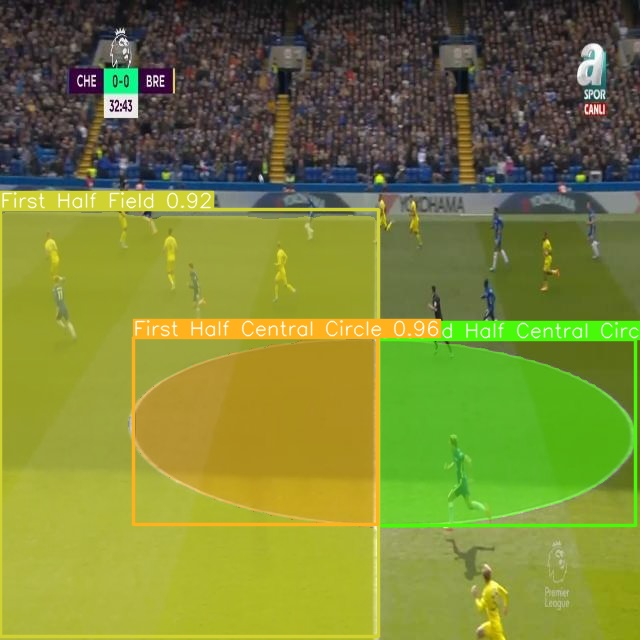

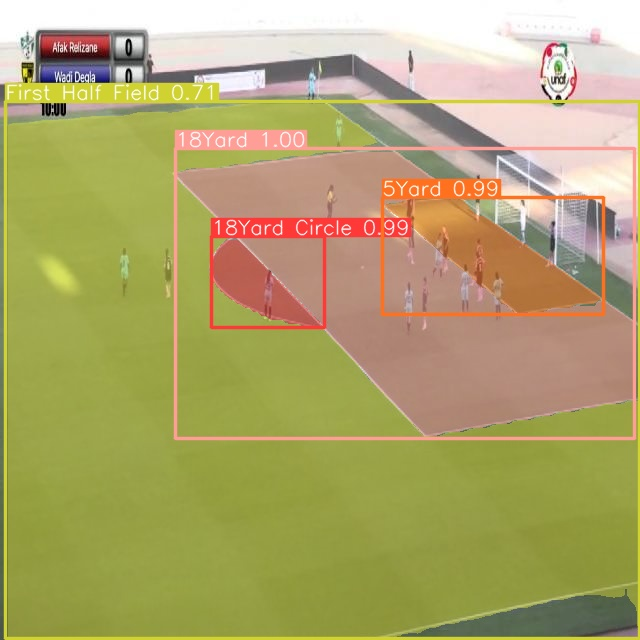

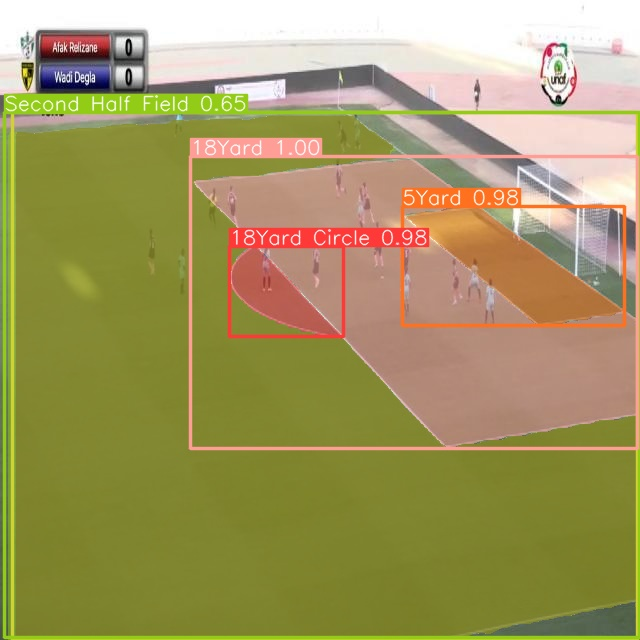

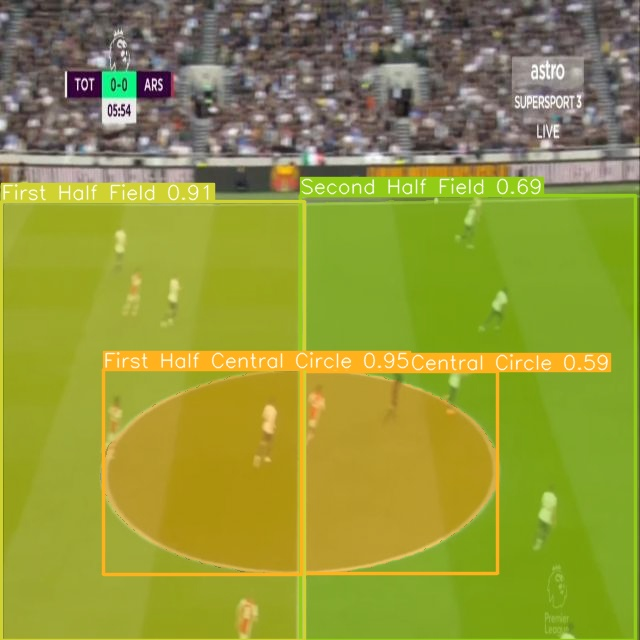

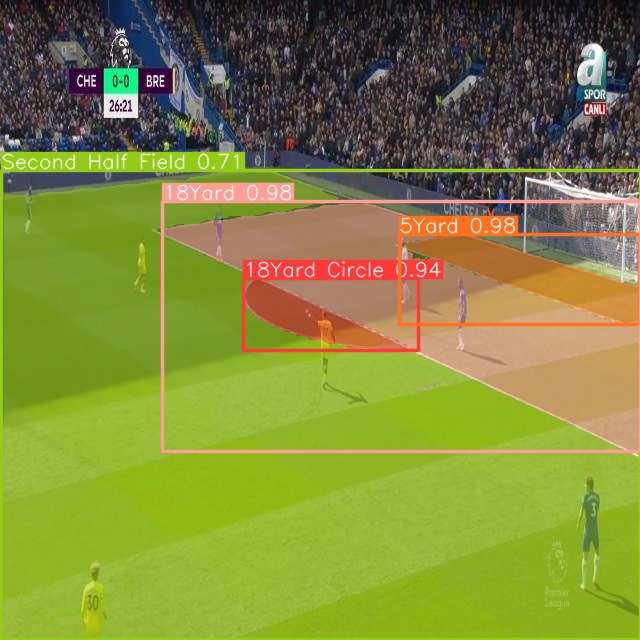

In [6]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display

for imageName in glob.glob("/content/runs/segment/predict/*.jpg")[:5]: #assuming JPG

    print("\n")
    display(Image(filename=imageName))

